This notebook will provide you with an example of webscraping.

Before webscraping you have to check robots.txt in order to know rules of game.

**Question:** Are you allowed to webscrap wikipedia.org (German version)?

## 1. Preliminaries

In [1]:
from IPython.display import Image

We want to extract the geo locations of the Berlin U-Bahns from the wikipedia webite. Geo locations of Berlin U-Bahn can be found [here](https://de.wikipedia.org/wiki/Liste_der_Berliner_U-Bahnhöfe).

1) Find the containers (classes) where the geo-location is saved on those websites. Each browser has an "inspect" that will show the html code of the website.

2) Once you found it, you will see the link with the geo parameters, e.g: 

`<a href="//tools.wmflabs.org/geohack/geohack.php?pagename=Liste_der_Berliner_U-Bahnh%C3%B6fe&amp;language=de&amp;params=52.560555555556_N_13.334166666667_E_region:DE-BE_type:landmark&amp;title=Afrikanische+Stra%C3%9Fe" title="Afrikanische Straße"`


3) You have to extract only following coordinates: 52.560555555556, 13.334166666667 

Example of the page and selected item:

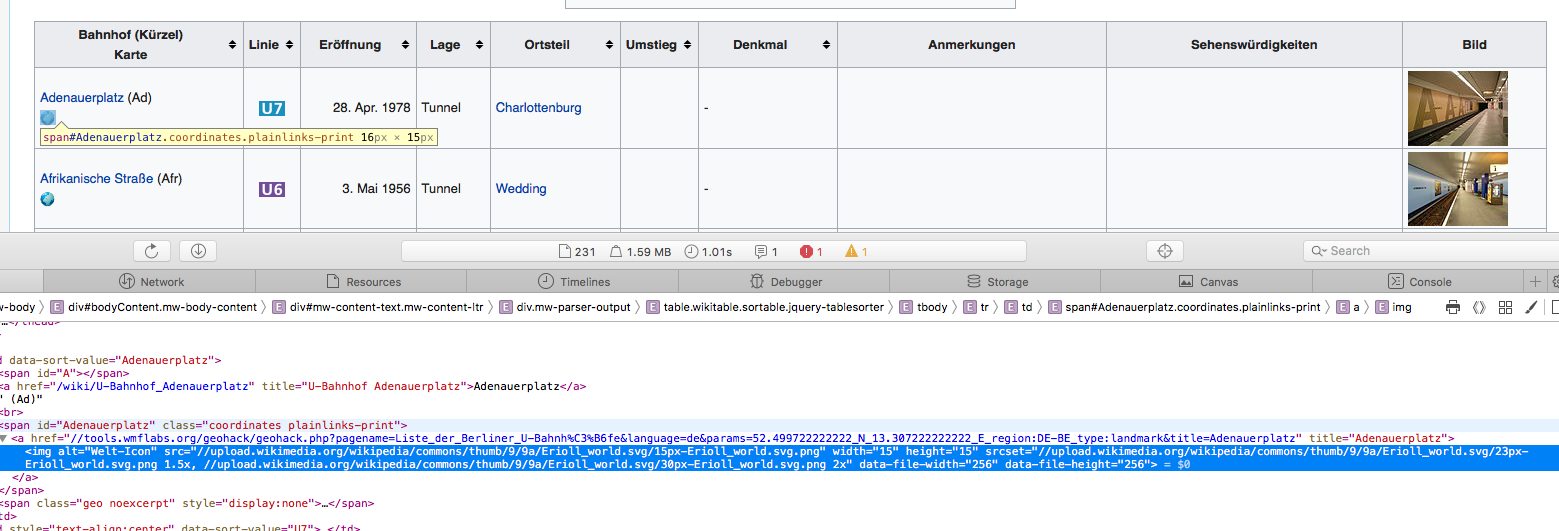

In [2]:
PATH = "../html_wikipedia.png"
Image(filename = PATH)

## 2. CODE

In [3]:
from bs4 import BeautifulSoup # parses the html
import requests # fetches the data from the website
import re
import pandas as pd

### 2.1 Fetch content from the url
Use requests library. Useful [functions](http://docs.python-requests.org/en/master/), [code snippes](https://gist.github.com/jkokatjuhha/02af3a28cf512ee8a3096273850fe029)

In [4]:
page_link = "https://de.wikipedia.org/wiki/Liste_der_Berliner_U-Bahnhöfe"
page_response = requests.get(page_link, timeout=5)

### 2.2 Parse html
1. Parse the request with [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).
2. Find the class (which you found in the 1.1) step) in the parsed html. Useful function might be find_all() with 'class_' argument, check it [here](https://www.crummy.com/software/BeautifulSoup/bs3/documentation.html#The%20basic%20find%20method:%20findAll(name,%20attrs,%20recursive,%20text,%20limit,%20**kwargs)

The result should be the array containing this specific class for each station.

In [19]:
wiki_page = BeautifulSoup(page_response.content, "html.parser")
stations = wiki_page.find_all(class_= 'plainlinks-print')

### 2.3 Find and save coordinates of each station

The result from 2.2 should be the array containing this specific class for each station. This means that we need to iterate over each element to extract the station coordinates and the name.

Each element of your result from 2.2 will have an 'a href' element (a link) which you can also extract with a 'find' function as mentioned [here](https://stackoverflow.com/questions/5815747/beautifulsoup-getting-href).

In [30]:
lat = [] # latitude
long = [] # longtitude
station_names = []

In [31]:
for station in stations:
    station_name = station["id"]
    finds = station.find('a', href=True)    
    href = re.findall(r'(?<=params=).*?(?=_E_region)', finds['href'])[0].split("_N_")   
    
    lat.append(href[0])
    long.append(href[1])
    station_names.append(station_name)

Save the lat, long and station name into a dataframe and check it out.

In [32]:
stat_geo = pd.DataFrame({'station_name':station_names, 
                         'latitude': lat, 
                         'longtitude':long})

In [34]:
stat_geo.drop_duplicates(inplace=True)